# **Executive Search**
In the context of the Quadratic Assignment Problem, "Executive Search" refers to a classical brute-force approach used to find all possible combinations of assignments between two sets (e.g., facilities and locations) and then determine the optimal solution.

In [1]:
import numpy as np
from itertools import permutations

In [2]:
def compute_cost(F, D, P):
    """Compute the cost for a given permutation P."""
    n = len(P)
    cost = 0
    for i in range(n):
        for j in range(n):
            cost += F[i][j] * D[P[i]][P[j]]
    return cost

In [3]:
def find_optimal_qap_solution(F, D):
    """Find the optimal solution for the Quadratic Assignment Problem."""
    n = len(D)
    all_permutations = permutations(range(n))
    optimal_cost = float('inf')
    optimal_permutation = None

    for P in all_permutations:
        cost = compute_cost(F, D, P)
        if cost < optimal_cost:
            optimal_cost = cost
            optimal_permutation = P

    return optimal_permutation, optimal_cost

In [4]:
F = np.array([
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
])

# Distance matrix
D = np.array([
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
])

n = F.shape[0]  # Number of facilities/locations

# Find the optimal solution
optimal_permutation, optimal_cost = find_optimal_qap_solution(F, D)

# Output the results
print("Optimal Permutation:", optimal_permutation)
print("Optimal Cost:", optimal_cost)


Optimal Permutation: (0, 2, 1, 3)
Optimal Cost: 44


# **Evolutionary Algorithm**
Differential Evolution (DE) is a robust and efficient evolutionary algorithm that can be applied to solve the Quadratic Assignment Problem (QAP). It is particularly useful for handling the combinatorial complexity of QAP by exploring the solution space through mutation, crossover, and selection mechanisms.

In [6]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 80.8 MB/s eta 0:00:00


In [7]:
from mealpy import PermutationVar, Problem,AGTO, DE
import numpy as np
from time import time

In [8]:
class QAP(Problem):
    def __init__(self, bounds=None, minmax="min", name="QAP", data=None, **kwargs):
        self.name = name
        self.data = data
        self.validate_data()
        super().__init__(bounds, minmax, **kwargs)

    def validate_data(self):
        # Validate input data for the QAP problem
        if "facilitiesFlow" not in self.data or "locationsDistance" not in self.data:
            raise ValueError("Input data must contain 'facilitiesFlow' and 'locationsDistance'")
        flow_shape = np.shape(self.data["facilitiesFlow"])
        dist_shape = np.shape(self.data["locationsDistance"])
        if len(flow_shape) != 2 or len(dist_shape) != 2 or flow_shape[0] != flow_shape[1] or dist_shape[0] != dist_shape[1]:
            raise ValueError("Input matrices must be square")
        if flow_shape[0] != dist_shape[0]:
            raise ValueError("Dimensions of input matrices must match")

    def obj_func(self, solution):
        flow = np.array(self.data["facilitiesFlow"])
        dist = np.array(self.data["locationsDistance"])
        # Convert solution to integer array
        solution = np.array(solution, dtype=int)
        # Use NumPy indexing and broadcasting for efficient computation
        total_cost = np.sum(dist * flow[solution[:, None], solution])
        return total_cost

In [9]:

data = {
    "locationsDistance": np.array([
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
])
    ,
    "facilitiesFlow": np.array([
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
])
}

n = F.shape[0]  # Number of facilities/locations
problem = QAP(bounds=PermutationVar(valid_set=list(range(n)), name="perm"), minmax="min", name="QAP", data=data,  save_population=True)
model =  DE.OriginalDE(epoch=100, pop_size=100)
g_best = model.solve(problem)
print(f"Best fitness: {g_best.target.fitness}, Best solution: {g_best.solution}")

INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 44.0, Global best: 44.0, Runtime: 0.01201 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 44.0, Global best: 44.0, Runtime: 0.01741 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 44.0, Global best: 44.0, Runtime: 0.01457 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 44.0, Global best: 44.0, Runtime: 0.01453 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 44.0, Global best: 44.0, Runtime: 0.01518 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 44.0, Global best: 44.0, Runtime: 0.01524 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 7, Current best: 44.0, Global best: 4

Best fitness: 44.0, Best solution: [1. 3. 0. 2.]


In [10]:
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")

model.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename="hello/tc")

In [11]:
n = 12
data = {
    "locationsDistance": np.array([
[0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5],
[1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4],
[2, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3],
[3, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2],
[1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4],
[2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3],
[3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2],
[4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1],
[2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3],
[3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2],
[4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1],
[5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0]]
    ),
    "facilitiesFlow": np.array(
[
[0,  5,  2,  4,  1,  0,  0,  6,  2,  1,  1,  1],
[5,  0,  3,  0,  2,  2,  2,  0,  4,  5,  0,  0],
[2,  3,  0,  0,  0,  0,  0,  5,  5,  2,  2,  2],
[4,  0,  0,  0,  5,  2,  2, 10,  0,  0,  5,  5],
[1,  2,  0,  5,  0, 10,  0,  0,  0,  5,  1,  1],
[0,  2,  0,  2, 10,  0,  5,  1,  1,  5,  4,  0],
[0,  2,  0,  2,  0,  5,  0, 10,  5,  2,  3,  3],
[6,  0,  5, 10,  0,  1, 10,  0,  0,  0,  5,  0],
[2,  4,  5,  0,  0,  1,  5,  0,  0,  0, 10, 10],
[1,  5,  2,  0,  5,  5,  2,  0,  0,  0,  5,  0],
[1,  0,  2,  5,  1,  4,  3,  5, 10,  5,  0,  2],
[1,  0,  2,  5,  1,  0,  3,  0, 10,  0,  2,  0]
])
}

problem = QAP(bounds=PermutationVar(valid_set=list(range(n)), name="perm"), minmax="min", name="QAP", data=data,  save_population=True)
model =  DE.OriginalDE(epoch=500, pop_size=100)
g_best = model.solve(problem)
print(f"Best fitness: {g_best.target.fitness}, Best solution: {g_best.solution}")

INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 684.0, Global best: 684.0, Runtime: 0.02020 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 676.0, Global best: 676.0, Runtime: 0.02153 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 676.0, Global best: 676.0, Runtime: 0.02400 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 676.0, Global best: 676.0, Runtime: 0.01880 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 676.0, Global best: 676.0, Runtime: 0.03154 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 676.0, Global best: 676.0, Runtime: 0.01825 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 7, Current best: 676.0, G

Best fitness: 600.0, Best solution: [ 4  5 11  3  9 10  6  7  1  8  2  0]


In [12]:
model.history.save_global_objectives_chart(filename="hello1/goc")
model.history.save_local_objectives_chart(filename="hello1/loc")

model.history.save_global_best_fitness_chart(filename="hello1/gbfc")
model.history.save_local_best_fitness_chart(filename="hello1/lbfc")

model.history.save_runtime_chart(filename="hello1/rtc")

model.history.save_exploration_exploitation_chart(filename="hello1/eec")

model.history.save_diversity_chart(filename="hello1/dc")

model.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename="hello1/tc")

# **Quantum Annealing (D-wave) & Variational Quantum Eigensolver**
Quantum Annealing (QA) is a specialized approach to solve combinatorial optimization problems, and D-Wave quantum computers are designed to perform QA efficiently. The Quadratic Assignment Problem (QAP), being an NP-hard problem, is well-suited for exploration using quantum annealing due to its combinatorial nature.

Variational Quantum Eigensolver (VQE) is a hybrid quantum-classical algorithm that combines quantum computation and classical optimization to find the minimum eigenvalue (ground state energy) of a given Hamiltonian. While initially developed for quantum chemistry problems, VQE has applications in solving combinatorial optimization problems like the Quadratic Assignment Problem (QAP).

In [13]:
!pip install qiskit
!pip install qiskit-optimization
!pip install docplex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 31.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 23.5 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.29.241-py3-none-any.whl size=685423 sha256=75be52b946fa54a8

\

In [14]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def QAP_as_ILP(N, flow_matrix, distance_matrix, print_model=False):

    # Step 1: Create a QUBO/ILP using Qiskit's QuadraticProgram
    model = QuadraticProgram()

    # Step 2: Define binary variables x_ik
    # Each facility i is assigned to one location k
    for i in range(N):
        for k in range(N):
            model.binary_var(f"x_{i}_{k}")

    # Step 3: Define the Objective Function using minimize()
    # Minimize the total cost = sum(f_ij * d_kl * x_ik * x_jl)
    quadratic_terms = {}
    for i in range(N):
        for j in range(N):
            for k in range(N):
                for l in range(N):
                    var1 = f"x_{i}_{k}"
                    var2 = f"x_{j}_{l}"
                    coefficient = flow_matrix[i][j] * distance_matrix[k][l]
                    if coefficient != 0:  # Avoid adding zero coefficients
                        quadratic_terms[(var1, var2)] = coefficient

    model.minimize(quadratic=quadratic_terms)

    # Step 4: Add Constraints
    # Constraint 1: Each facility is assigned to exactly one location
    for i in range(N):
        model.linear_constraint(
            linear={f"x_{i}_{k}": 1 for k in range(N)},
            sense="==",
            rhs=1,
            name=f"facility_assignment_{i}"
        )

    # Constraint 2: Each location hosts exactly one facility
    for k in range(N):
        model.linear_constraint(
            linear={f"x_{i}_{k}": 1 for i in range(N)},
            sense="==",
            rhs=1,
            name=f"location_assignment_{k}"
        )

    # Step 5: Print Model (Optional)
    if print_model:
        print(model.prettyprint())

    return model


In [16]:
from qiskit_optimization.converters import QuadraticProgramToQubo

In [17]:
def convert_ILP_to_QUBO(model, print_model = False):
    qubo = QuadraticProgramToQubo().convert(model)

    if print_model:
        print(qubo.prettyprint())

    return qubo

In [19]:
F = np.array([
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
])

# Distance matrix
D = np.array([
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
])
n = F.shape[0]
print("QAP as ILP")
ilp_model = QAP_as_ILP(n,
                       F,
                       D,
                      print_model = True)

print("QAP as QUBO")
qubo_model = convert_ILP_to_QUBO(ilp_model,
                                print_model = True)

QAP as ILP
Problem name: 

Minimize
  4*x_0_0*x_1_1 + 8*x_0_0*x_1_2 + 12*x_0_0*x_1_3 + 6*x_0_0*x_2_1
  + 12*x_0_0*x_2_2 + 18*x_0_0*x_2_3 + 2*x_0_0*x_3_1 + 4*x_0_0*x_3_2
  + 6*x_0_0*x_3_3 + 4*x_0_1*x_1_0 + 16*x_0_1*x_1_2 + 8*x_0_1*x_1_3
  + 6*x_0_1*x_2_0 + 24*x_0_1*x_2_2 + 12*x_0_1*x_2_3 + 2*x_0_1*x_3_0
  + 8*x_0_1*x_3_2 + 4*x_0_1*x_3_3 + 8*x_0_2*x_1_0 + 16*x_0_2*x_1_1
  + 4*x_0_2*x_1_3 + 12*x_0_2*x_2_0 + 24*x_0_2*x_2_1 + 6*x_0_2*x_2_3
  + 4*x_0_2*x_3_0 + 8*x_0_2*x_3_1 + 2*x_0_2*x_3_3 + 12*x_0_3*x_1_0
  + 8*x_0_3*x_1_1 + 4*x_0_3*x_1_2 + 18*x_0_3*x_2_0 + 12*x_0_3*x_2_1
  + 6*x_0_3*x_2_2 + 6*x_0_3*x_3_0 + 4*x_0_3*x_3_1 + 2*x_0_3*x_3_2
  + 2*x_1_0*x_2_1 + 4*x_1_0*x_2_2 + 6*x_1_0*x_2_3 + 8*x_1_0*x_3_1
  + 16*x_1_0*x_3_2 + 24*x_1_0*x_3_3 + 2*x_1_1*x_2_0 + 8*x_1_1*x_2_2
  + 4*x_1_1*x_2_3 + 8*x_1_1*x_3_0 + 32*x_1_1*x_3_2 + 16*x_1_1*x_3_3
  + 4*x_1_2*x_2_0 + 8*x_1_2*x_2_1 + 2*x_1_2*x_2_3 + 16*x_1_2*x_3_0
  + 32*x_1_2*x_3_1 + 8*x_1_2*x_3_3 + 6*x_1_3*x_2_0 + 4*x_1_3*x_2_1
  + 2*x_1_3*x_2_2 + 24*x

k

# **MinimumEigenOptimizer**
The MinimumEigenOptimizer is a classical-quantum hybrid optimization algorithm that utilizes quantum eigensolvers to find the optimal solution. It is often used in conjunction with variational quantum algorithms, such as VQE (Variational Quantum Eigensolver), to solve problems like combinatorial optimization.

It works by minimizing a quadratic objective function through quantum eigenvalue estimation, which can be mapped onto a variety of problems, including the Quadratic Assignment Problem (QAP), Traveling Salesman Problem (TSP), and others.

In [20]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from itertools import combinations_with_replacement

In [21]:
# define the solver to have the exact solution
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())

In [22]:
result = exact.solve(qubo_model)


In [23]:
def interpret_qap_solution(solution_string):
    """
    Parses and interprets the QAP solution string, returning a readable interpretation.

    Parameters:
        solution_string (str): The encoded solution string.

    Returns:
        str: A human-readable interpretation of the solution.
    """
    # Ensure input is treated as a string
    solution_string = str(solution_string)
    assignments = {}

    # Debug: Print the input string
    print("Input string:")
    print(solution_string)

    # Parse "variable values"
    for item in solution_string.split(","):
        item = item.strip()  # Remove extra spaces
        if "=" in item and "x_" in item:  # Look for variable assignments
            variable, value = item.split("=")
            if float(value) == 1.0:
                _, facility, location = variable.split("_")
                assignments[int(facility)] = int(location)

    # Debug: Print parsed assignments
    print(f"Parsed assignments: {assignments}")

    # Build readable interpretation
    interpretation = ["QAP Solution Interpretation:"]
    for facility, location in sorted(assignments.items()):
        interpretation.append(f"  - Facility {facility} is assigned to Location {location}.")

    # Add "objective function value"
    if any("fval=" in item for item in solution_string.split(",")):
        for item in solution_string.split(","):
            if "fval=" in item:
                objective_value = item.split("=")[1].strip()
                interpretation.append(f"Objective function value: {objective_value}")
                break

    # Add "status"
    if any("status=" in item for item in solution_string.split(",")):
        for item in solution_string.split(","):
            if "status=" in item:
                status = item.split("=")[1].strip()
                interpretation.append(f"Status: {status}")
                break

    # Debug: Print the final interpretation
    print(f"Final interpretation: {interpretation}")

    return '  '.join(interpretation)

In [24]:
interpret_qap_solution(result)

Input string:
fval=44.0, x_0_0=1.0, x_0_1=0.0, x_0_2=0.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=1.0, x_1_3=0.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=0.0, x_3_1=0.0, x_3_2=0.0, x_3_3=1.0, status=SUCCESS
Parsed assignments: {0: 0, 1: 2, 2: 1, 3: 3}
Final interpretation: ['QAP Solution Interpretation:', '  - Facility 0 is assigned to Location 0.', '  - Facility 1 is assigned to Location 2.', '  - Facility 2 is assigned to Location 1.', '  - Facility 3 is assigned to Location 3.', 'Objective function value: 44.0', 'Status: SUCCESS']


'QAP Solution Interpretation:    - Facility 0 is assigned to Location 0.    - Facility 1 is assigned to Location 2.    - Facility 2 is assigned to Location 1.    - Facility 3 is assigned to Location 3.  Objective function value: 44.0  Status: SUCCESS'

# **Quantum Annealing (D-wave)**
Quantum Annealing (QA) is a specialized approach to solve combinatorial optimization problems, and D-Wave quantum computers are designed to perform QA efficiently. The Quadratic Assignment Problem (QAP), being an NP-hard problem, is well-suited for exploration using quantum annealing due to its combinatorial nature.

In [25]:
!pip install dwave-ocean-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.5/225.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00


In [26]:
from dimod.binary import BinaryQuadraticModel
from dwave.samplers import SimulatedAnnealingSampler

The Simulated Annealing Sampler is a classical solver provided by D-Wave, which is used for finding approximate solutions to combinatorial optimization problems, including those represented as BQMs. Simulated Annealing is a probabilistic optimization technique that tries to find the global minimum of an objective function by exploring the solution space in a manner akin to the physical process of annealing in metallurgy.

Simulated Annealing performs the optimization by gradually "cooling" the system, starting from a high temperature where the system can easily explore different solutions, and slowly decreasing the temperature so the system stabilizes in a minimum-energy state.

In [27]:
sampler = SimulatedAnnealingSampler()

In [28]:
dwave_qubo = BinaryQuadraticModel(qubo_model.objective.linear.to_dict(),
                                  qubo_model.objective.quadratic.to_dict(),
                                  qubo_model.objective.constant,
                                  'BINARY')

samplerset = sampler.sample(dwave_qubo, num_reads = 1000)

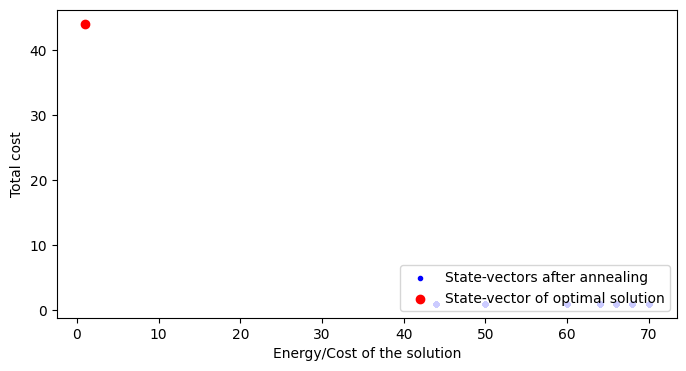

In [29]:
fig, ax = plt.subplots(figsize = (8,4))

bins_used = []
energies = []

for solution, energy, _ in samplerset.record:
    solution = np.array(solution)[:n*(n+1)].reshape(n,-1)
    bins_used.append(sum(solution[:,0]))
    energies.append(energy)

ax.scatter(energies, bins_used, color = 'b', marker = '.', label = 'State-vectors after annealing')

solution = list(samplerset.first.sample.values())
solution = np.array(solution)[:n*(n+1)].reshape(n,-1)
energies = samplerset.first.energy

ax.scatter([sum(solution[:,0])], [energies], color = 'r', marker = 'o', label = 'State-vector of optimal solution')
ax.set_ylabel('Total cost')
ax.set_xlabel('Energy/Cost of the solution')

plt.legend(loc = 'lower right')
plt.show()

In [30]:
possible_solutions = list(filter(lambda x: x[1]==samplerset.first.energy,samplerset.record))
print("Minimum energy:", samplerset.first.energy)
print("Number of vectors with minimum energy:", len(possible_solutions))

Minimum energy: 44.0
Number of vectors with minimum energy: 168


# **Variational Quantum Eigensolver**
Variational Quantum Eigensolver (VQE) is a hybrid quantum-classical algorithm that combines quantum computation and classical optimization to find the minimum eigenvalue (ground state energy) of a given Hamiltonian. While initially developed for quantum chemistry problems, VQE has applications in solving combinatorial optimization problems like the Quadratic Assignment Problem (QAP).

In [31]:
!pip install qiskit_ibm_runtime==0.29.0
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.1 MB/s eta 0:00:00


In [32]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator, SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from scipy.optimize import minimize

In [33]:
def VQE_for_QAP(qubo, ansatz):
    #define a cost_function which constructs and evaluate the ansatz
    # with some parameters and returns the expectation value of the hamiltonian obtained from the QUBO
    def cost_func(params, in_ansatz, hamiltonian, estimator, callback_dict):
        pub = (in_ansatz, [hamiltonian], [params])
        result = estimator.run([pub]).result()
        energy = result[0].data.evs[0]

        callback_dict["iters"] += 1
        callback_dict["prev_vector"] = params
        callback_dict["cost_history"].append(energy)
        return energy, result

    #a function compatible with scipy's minimize function
    def cost_func_2(*args, **kwargs):
        energy, result = cost_func(*args, **kwargs)
        return energy

    backend = AerSimulator() # a backend for local simulations
    pm = generate_preset_pass_manager(backend = backend,
                                      optimization_level = 1) # a pass manager to make the circuit compatible with backend
    isa_circuit = pm.run(ansatz) # a circuit that obeys the backend's instruction set arquitecture (ISA)
    H = qubo.to_ising()[0].apply_layout(layout=isa_circuit.layout) # Ising hamiltonian from the QUBO and compatible with isa_circuit layout

    # a dictionary to store results
    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    x0 = [np.pi/2]*ansatz.num_parameters # initial parameters

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, H, Estimator(backend = backend), callback_dict),
        method="cobyla",
        options={'maxiter': 700}) # optimization step

    ansatz.measure_all() #add classical registers and measurements to ansatzs circuit
    pm = generate_preset_pass_manager(backend = backend,
                                      optimization_level = 1)
    isa_circuit = pm.run(ansatz)
    sampler = Sampler(backend = backend)

    job = sampler.run([(isa_circuit, callback_dict["prev_vector"], 10240)]) #run the circuit with best fit parameters
    result = job.result()
    solution = result[0].data.meas.get_counts()

    return callback_dict, solution

In [34]:
ansatz_1 = TwoLocal(num_qubits = len(qubo_model.variables),
                 rotation_blocks = ["rx"],
                 entanglement_blocks = ["cx"],
                 entanglement = "full",
                 reps = 1,
                 insert_barriers = True)

In [35]:
ansatz_2 = TwoLocal(num_qubits = len(qubo_model.variables),
                 rotation_blocks = ["rx","ry"],
                 entanglement_blocks = ["cz"],
                 entanglement = "full",
                 reps = 1,
                 insert_barriers = True)

In [36]:
ansatz_3 = EfficientSU2(num_qubits = len(qubo_model.variables),
                 su2_gates = ["rx","ry"],
                 entanglement = "full",
                 reps = 1,
                 insert_barriers = True)

In [37]:
ansatz_4 = EfficientSU2(num_qubits = len(qubo_model.variables),
                 su2_gates = ["rx"],
                 entanglement = "circular",
                 reps = 1,
                 insert_barriers = True)

In [38]:
res_all_ansatz = []
sol_all_ansatz = []

for an in (ansatz_1, ansatz_2, ansatz_3, ansatz_4,):
    res_energies, result = VQE_for_QAP(qubo = qubo_model,
                                       ansatz = an)
    max_counts = max(result, key = lambda x: result[x])
    res_all_ansatz.append(res_energies)
    sol_all_ansatz.append({max_counts : result[max_counts]})

<ipython-input-33-d68bc1193006>:37: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  args=(isa_circuit, H, Estimator(backend = backend), callback_dict),
<ipython-input-33-d68bc1193006>:45: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend = backend)
<ipython-input-33-d68bc1193006>:37: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  args=(isa_circuit, H, Estimator(backend = backend), callback_dict),
<ipython-input-33-d68bc1193006>:45: DeprecationWarning: The 'backend' keyword arguments a

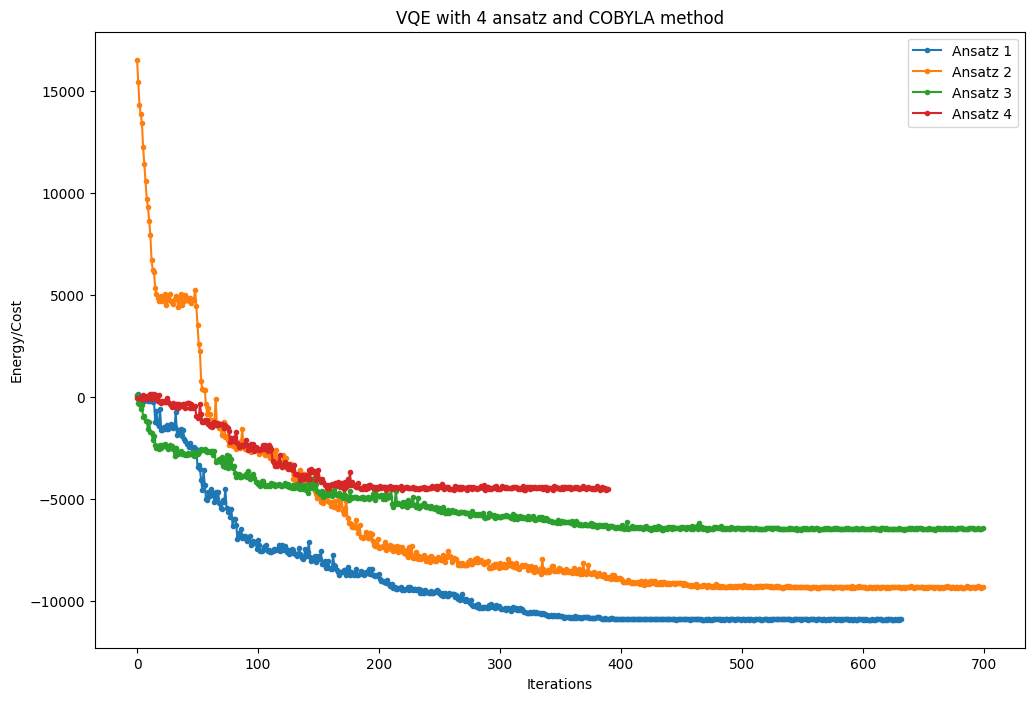

In [39]:
fig, ax = plt.subplots(figsize = (12,8))

for i, an in enumerate(res_all_ansatz):
    ax.plot(range(an["iters"]), an["cost_history"], marker = ".", ls = "-", label = f"Ansatz {i+1}")

ax.set_xlabel("Iterations")
ax.set_ylabel("Energy/Cost")
ax.set_title("VQE with 4 ansatz and COBYLA method")
plt.legend(loc = "upper right")
plt.show()

In [51]:
def interpret_bitstring(bitstring):
    # Create an empty matrix to store the assignments
    assignment = {}

    # Map each bitstring position to a facility-location assignment
    for i, bit in enumerate(bitstring):
        # Only consider the bit when it's 1 (indicating an assignment)
        if bit == '1':
            facility = i // 4  # Determine which facility (0-3)
            location = i % 4  # Determine which location (0-3)
            assignment[facility] = location

    # Create a human-readable string
    result = []
    for facility in range(4):
        location = assignment.get(facility, 'Not assigned')
        result.append(f"Facility {facility} → Location {location}")

    return result

In [52]:
for i,(bits,counts) in enumerate((list(x.items())[0] for x in sol_all_ansatz)):
    print(f"Ansatz {i+1} \t Counts : {counts}")
    print(f"Solution bitstring : {bits[::-1]}")
    bits = list(bits[::-1])
    bits = np.array(list(map(int,bits)))
    print(f"Solution : {interpret_bitstring(str(bits[::-1]))}")

Ansatz 1 	 Counts : 9827
Solution bitstring : 1000000101000010
Solution : ['Facility 0 → Location 3', 'Facility 1 → Location Not assigned', 'Facility 2 → Location Not assigned', 'Facility 3 → Location 1']
Ansatz 2 	 Counts : 3777
Solution bitstring : 0010010000011000
Solution : ['Facility 0 → Location Not assigned', 'Facility 1 → Location 3', 'Facility 2 → Location 1', 'Facility 3 → Location Not assigned']
Ansatz 3 	 Counts : 1969
Solution bitstring : 0101100101101000
Solution : ['Facility 0 → Location Not assigned', 'Facility 1 → Location 3', 'Facility 2 → Location 3', 'Facility 3 → Location 1']
Ansatz 4 	 Counts : 328
Solution bitstring : 0001101010101001
Solution : ['Facility 0 → Location 1', 'Facility 1 → Location 3', 'Facility 2 → Location 3', 'Facility 3 → Location 3']
